Так как время работы на одном потоке не зависит от величины threshold, то наибольшее ускорение достигается при наименьшем времени работы при заданном числе потоков.

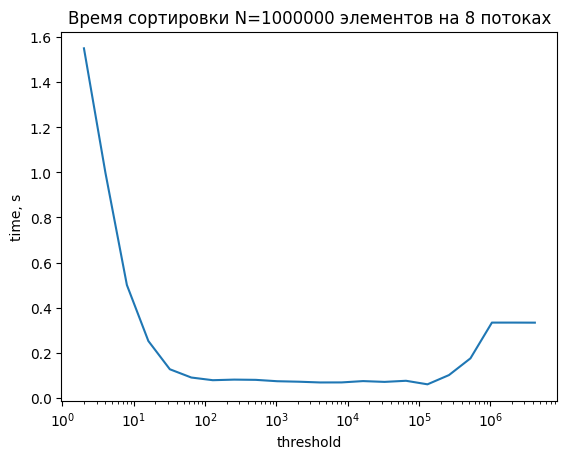

In [4]:
import matplotlib.pyplot as plt

merge_t = [1.54995, 0.998276, 0.500444, 0.252193, 0.126928, 0.0902379, 0.0783875, 0.0810071, 0.079925, 0.0738376, 0.0717002, 0.0683453, 0.0685495, 0.0744164, 0.0708829, 0.0757917, 0.060101, 0.10106, 0.175269, 0.333747, 0.333799, 0.333531]
threshold = [2**x for x in range(1, 23)]

plt.plot(threshold, merge_t)
plt.title("Время сортировки N=1000000 элементов на 8 потоках")
plt.xlabel("threshold")
plt.ylabel("time, s")
plt.xscale("log")

Построим графики ускорения и эффективности при threshold $\in \{10^1, 10^2, 10^3, 10^4\}$